In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("C:/Users/Rebel/Desktop/DS/I S/Mentorness/MACHINE LEARNING/Project 2 Fastag Fraud detection/FastagFraudDetection.csv")
df

,Transaction_ID,Timestamp,Vehicle_Type,FastagID,TollBoothID,Lane_Type,Vehicle_Dimensions,Transaction_Amount,Amount_paid,Geographical_Location,Vehicle_Speed,Vehicle_Plate_Number,Fraud_indicator
0,1,1/6/2023 11:20,Bus,FTG-001-ABC-121,A-101,Express,Large,350,120,"13.059816123454882, 77.77068662374292",65,KA11AB1234,Fraud
1,2,1/7/2023 14:55,Car,FTG-002-XYZ-451,B-102,Regular,Small,120,100,"13.059816123454882, 77.77068662374292",78,KA66CD5678,Fraud
2,3,1/8/2023 18:25,Motorcycle,NaN,D-104,Regular,Small,0,0,"13.059816123454882, 77.77068662374292",53,KA88EF9012,Not Fraud
3,4,1/9/2023 2:05,Truck,FTG-044-LMN-322,C-103,Regular,Large,350,120,"13.059816123454882, 77.77068662374292",92,KA11GH3456,Fraud
4,5,1/10/2023 6:35,Van,FTG-505-DEF-652,B-102,Express,Medium,140,100,"13.059816123454882, 77.77068662374292",60,KA44IJ6789,Fraud
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,1/1/2023 22:18,Truck,FTG-445-EDC-765,C-103,Regular,Large,330,330,"13.21331620748757, 77.55413526894684",81,KA74ST0123,Not Fraud
4996,4997,1/17/2023 13:43,Van,FTG-446-LMK-432,B-102,Express,Medium,125,125,"13.21331620748757, 77.55413526894684",64,KA38UV3456,Not Fraud
4997,4998,2/5/2023 5:08,Sedan,FTG-447-PLN-109,A-101,Regular,Medium,115,115,"13.21331620748757, 77.55413526894684",93,KA33WX6789,Not Fraud
4998,4999,2/20/2023 20:34,SUV,FTG-458-VFR-876,B-102,Express,Large,145,145,"13.21331620748757, 77.55413526894684",57,KA35YZ0123,Not Fraud


In [3]:
# Convert 'Timestamp' column to datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

In [4]:
df.isnull()

,Transaction_ID,Timestamp,Vehicle_Type,FastagID,TollBoothID,Lane_Type,Vehicle_Dimensions,Transaction_Amount,Amount_paid,Geographical_Location,Vehicle_Speed,Vehicle_Plate_Number,Fraud_indicator
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,True,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,False,False,False,False,False,False,False,False,False,False,False,False,False
4996,False,False,False,False,False,False,False,False,False,False,False,False,False
4997,False,False,False,False,False,False,False,False,False,False,False,False,False
4998,False,False,False,False,False,False,False,False,False,False,False,False,False


In [5]:
print("Missing values in 'FastagID':", df['FastagID'].isnull().sum())

Missing values in 'FastagID': 549


In [6]:
df = df.dropna(subset=['FastagID'])

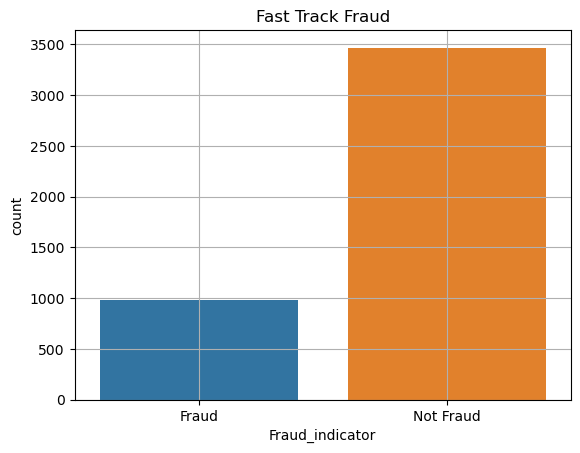

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Countplot for 'Fraud_indicator'
sns.countplot(x='Fraud_indicator', data=df)
plt.title("Fast Track Fraud")
plt.grid(True)
plt.show()

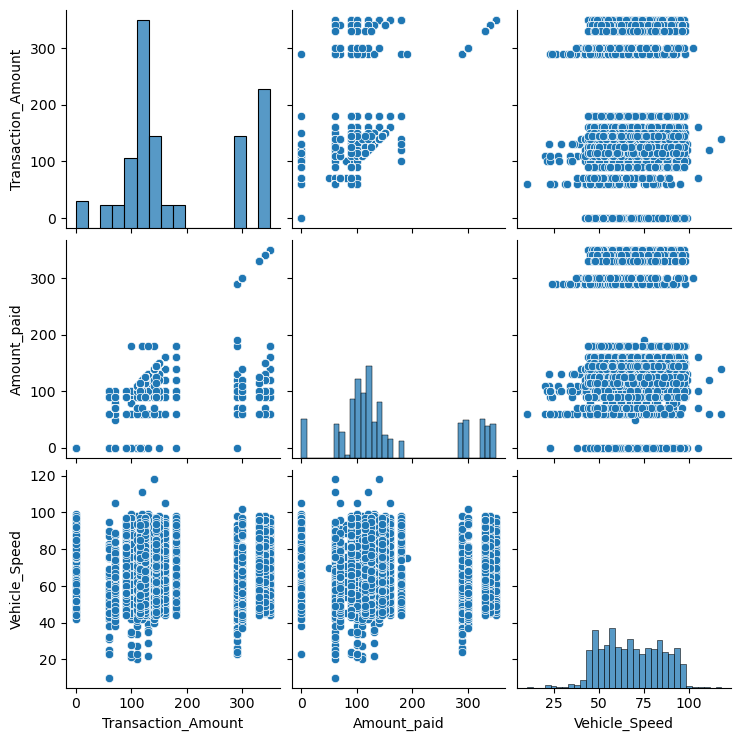

In [8]:
# Pairwise scatter plots for numerical variables
sns.pairplot(df, vars=['Transaction_Amount', 'Amount_paid', 'Vehicle_Speed'])
plt.show()

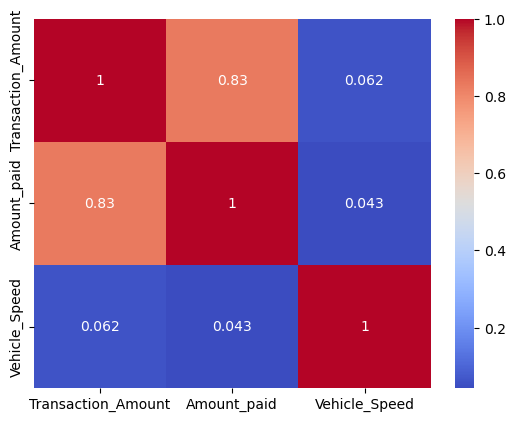

In [9]:
# Correlation matrix and heatmap for numerical variables
correlation_matrix = df[['Transaction_Amount', 'Amount_paid', 'Vehicle_Speed']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

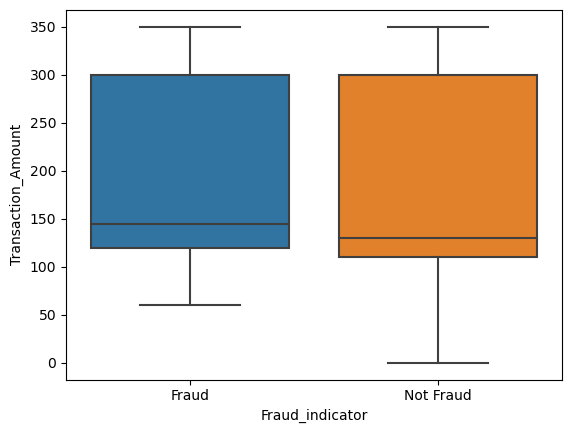

In [10]:
# Box plot for 'Transaction_Amount' and 'Amount_paid'
sns.boxplot(x='Fraud_indicator', y='Transaction_Amount', data=df)
plt.show()

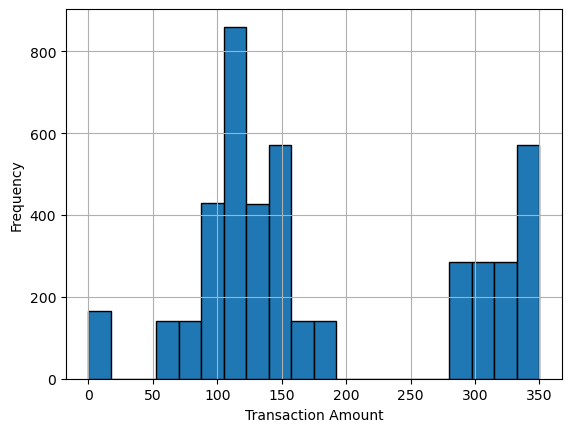

In [11]:
# Histogram of 'Transaction_Amount'
plt.hist(df['Transaction_Amount'], bins=20, edgecolor='black')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [12]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import LabelEncoder

In [13]:
#Select features Transaction_Amount, Amount_paid
x = df[['Transaction_Amount', 'Amount_paid']]
y = df['Fraud_indicator']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [14]:
#Scaling and encoding output 
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

In [15]:
#Neural network model
model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(x_train_scaled.shape[1],)))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [16]:
pip install pydot

Note: you may need to restart the kernel to use updated packages.


In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import plot_model

# Define your model
model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(x_train_scaled.shape[1],)))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Plot the model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

from IPython.display import Image

# Plot the model and display it
plot_model(model, show_shapes=True, show_layer_names=True)


You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.
You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [18]:
model.summary()
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 32)                96        
                                                                 
 dense_4 (Dense)             (None, 16)                528       
                                                                 
 dense_5 (Dense)             (None, 1)                 17        
                                                                 
Total params: 641 (2.50 KB)
Trainable params: 641 (2.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________



In [19]:
model.fit(x_train_scaled, y_train_encoded, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10


89/89 [==============================] - 6s 13ms/step - loss: 0.5746 - accuracy: 0.7591 - val_loss: 0.4471 - val_accuracy: 0.8539
Epoch 2/10
89/89 [==============================] - 0s 4ms/step - loss: 0.3620 - accuracy: 0.8571 - val_loss: 0.3025 - val_accuracy: 0.8750
Epoch 3/10
89/89 [==============================] - 0s 4ms/step - loss: 0.2485 - accuracy: 0.8975 - val_loss: 0.2140 - val_accuracy: 0.9157
Epoch 4/10
89/89 [==============================] - 0s 4ms/step - loss: 0.1827 - accuracy: 0.9287 - val_loss: 0.1770 - val_accuracy: 0.9607
Epoch 5/10
89/89 [==============================] - 0s 4ms/step - loss: 0.1458 - accuracy: 0.9505 - val_loss: 0.1396 - val_accuracy: 0.9607
Epoch 6/10
89/89 [==============================] - 0s 4ms/step - loss: 0.1181 - accuracy: 0.9582 - val_loss: 0.1192 - val_accuracy: 0.9719
Epoch 7/10
89/89 [==============================] - 0s 4ms/step - loss: 0.1006 - accuracy: 0.9737 - val_loss: 0.1081 - val_accuracy: 0.9803
Epoch 8/10
89/89 

In [23]:
y_pred_prob = model.predict(x_test_scaled)

# Convert probabilities to binary predictions
y_pred = np.round(y_pred_prob)

# Print accuracy metrics
accuracy = accuracy_score(y_test_encoded, y_pred)
precision = precision_score(y_test_encoded, y_pred)
recall = recall_score(y_test_encoded, y_pred)
f1 = f1_score(y_test_encoded, y_pred)

# Print accuracy metrics
print("Accuracy: {:.2f}%".format(accuracy * 100))
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1 Score: {:.2f}".format(f1))

28/28 [==============================] - 0s 3ms/step
Accuracy: 98.43%
Precision: 0.98
Recall: 1.00
F1 Score: 0.99


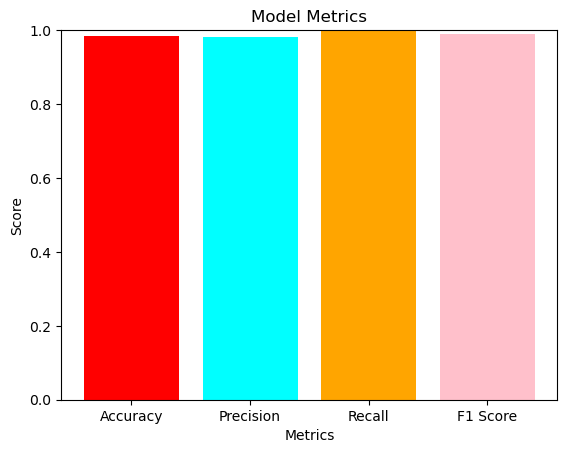

In [26]:
#Accuracy metrics
import matplotlib.pyplot as plt


metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
values = [accuracy, precision, recall, f1]

plt.bar(metrics, values, color=['red', 'cyan', 'orange', 'pink'])
plt.ylabel('Score')
plt.xlabel('Metrics')
plt.title('Model Metrics')
plt.ylim(0, 1)  
plt.show()